<a href="https://colab.research.google.com/github/shaifali1102/unsupervised-learning/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scaler: Clustering**

![scaler](https://scaler-blog-prod-wp-content.s3.ap-south-1.amazonaws.com/wp-content/uploads/2020/07/22113930/Scaler-HT-1-.png)

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

## **Problem statement:**
As a data scientist with Scaler's analytics vertical, we want to profile the best companies and job positions from the Scaler database.
Information for a segment of learners has been provided.
The task is to cluster these learners based on their job profile, company, and other features.
Ideally, these clusters should exhibit similar characteristics.


In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1fxlhFgwZiu8F_hJGdHjV_fdSocvKf_wZ

Downloading...
From: https://drive.google.com/uc?id=1fxlhFgwZiu8F_hJGdHjV_fdSocvKf_wZ
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 88.2MB/s]


In [ ]:
#Read the dataset
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## Data Exploration

In [ ]:
df.shape

(205843, 7)

- there are ~2L data points

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
# Dropping Unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# convert orgyear to category
df['orgyear'] = df['orgyear'].astype('category')
#convert ctc_updated_year
df['ctc_updated_year'] = df['ctc_updated_year'].astype('category')

In [ ]:
df.describe(include='all')

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205799,205843,205757.0,2.058430e+05,153279,205843.0
unique,37299,153443,77.0,NaN,1016,7.0
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,NaN,Backend Engineer,2019.0
freq,8337,10,25256.0,NaN,43554,68688.0
mean,NaN,NaN,NaN,2.271685e+06,NaN,NaN
std,NaN,NaN,NaN,1.180091e+07,NaN,NaN
min,NaN,NaN,NaN,2.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,5.300000e+05,NaN,NaN
50%,NaN,NaN,NaN,9.500000e+05,NaN,NaN
75%,NaN,NaN,NaN,1.700000e+06,NaN,NaN


- ctc is the only continous feature and all others are categorical
- company_hash - identifier of the company
- email_hash - PII, can be dropped as we don't need this data in our analysis
- orgyear - employment start date
- ctc - current ctc
- job_position - job profile in the company
- ctc_updated_year - year in which ctc was last updated


## Analysing data

In [ ]:
df.isna().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
cols = ['email_hash','company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year']

for col in cols:
  print(f'-----------{col}--------------')
  # count of unique values
  print(f'Unique values: {df[col].nunique()}')
  # count of null values
  print(df[col].value_counts())

-----------email_hash--------------
Unique values: 153443
email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
                                                                    ..
3def1401b5a8879eeb4a8465663a9c6c66702c85444d7ede5816f58792eb9d41     1
1a304832f202aafe1b12449189a7d5809b8aeb202e19fc15163b0c27c722ff27     1
e3fd08d199c5d805d7b587de710f1ca4e7e686570d07b56c82273a9be943f98b     1
ebcaf397ef5084e05889a6e9a0c3f96a5c8fb0b16749cef5ee3ce31a0271c12b     1
134cc4a76a119493d523f1855a3b7106f64287455d5cd4bb14f4ad0659fe8a5f     1
Name: count, Length: 153443, dtype: int64
-----------company_hash--------------
Unique values: 37299
company_hash
nvnv wgzohrnvzwj otqcxwto    8337
xz

In [ ]:
for col in ['email_hash','company_hash']:
  print(f'-----------{col}--------------')
  # count of unique values
  counts = df[col].value_counts().value_counts()
  print(counts)

-----------email_hash--------------
count
1     112227
2      32553
3       6749
4       1466
5        329
6         94
7         15
8          6
9          3
10         1
Name: count, dtype: int64
-----------company_hash--------------
count
1       23494
2        6760
3        2163
4        1102
5         611
        ...  
1392        1
1400        1
1499        1
1696        1
2033        1
Name: count, Length: 265, dtype: int64


- there are ~1.5L unique emails, one email is used 10 times, three emails are used 9 times and six emails are used eight times as well.
- there are 44 missing values, 37299 unique values and top freq is 8337 for company data
- learners seems to have started their career across 77 different years, however we do see unmeaningful years like 2204, 200, 38 etc and there are 86 missing values. This will lead to outliers.
- there are 3360 unique ctc's, 6L being the most common and ~2L being the least common
- there are around 50k missing values from job_position, top position is 43k
- the most ctc_updated_year is 2019, least is 2015

## Univariate and Bivariate Analysis

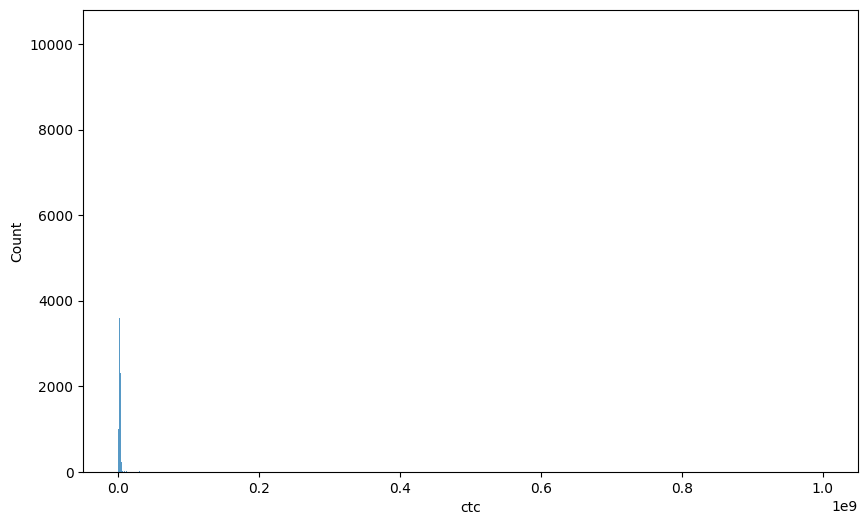

In [ ]:
# plotting continuous feature - ctc
plt.figure(figsize=(10,6))
sns.histplot(df['ctc'])
plt.show()

- ctc is highly right skewed
- this trend suggests that some people might be getting paid a lot more, though there's a chance of outliers affecting the skewness
- we will analize ctc for outliers as well

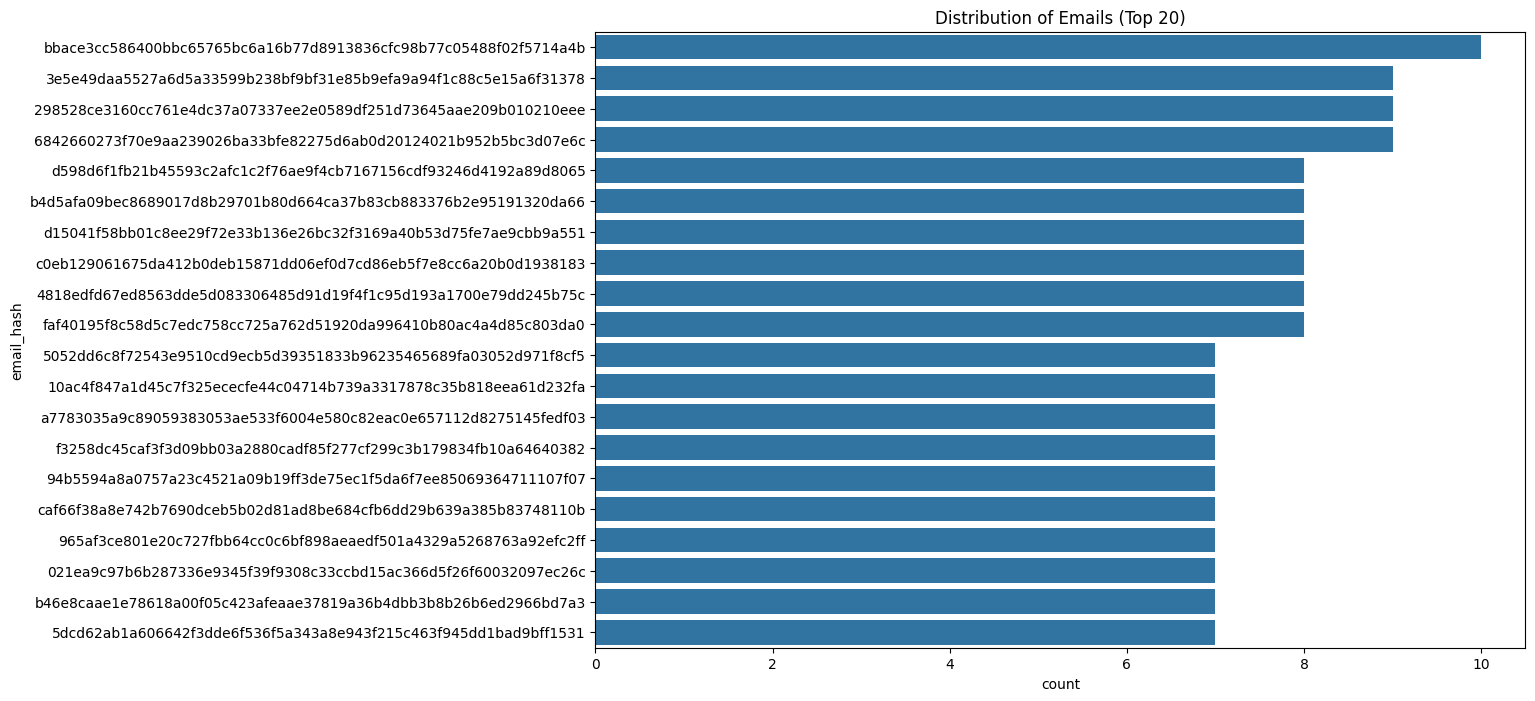

In [ ]:
# email_hash : display only top 20
plt.figure(figsize=(12,8)) # Increased height for y-axis labels
plt.title(f'Distribution of Emails (Top 20)')
# get top 20 emails and their counts
top_emails = df['email_hash'].value_counts().head(20).index
sns.countplot(df[df['email_hash'].isin(top_emails)]['email_hash'], order=top_emails)
plt.show()

- highest an email is used is 10 times

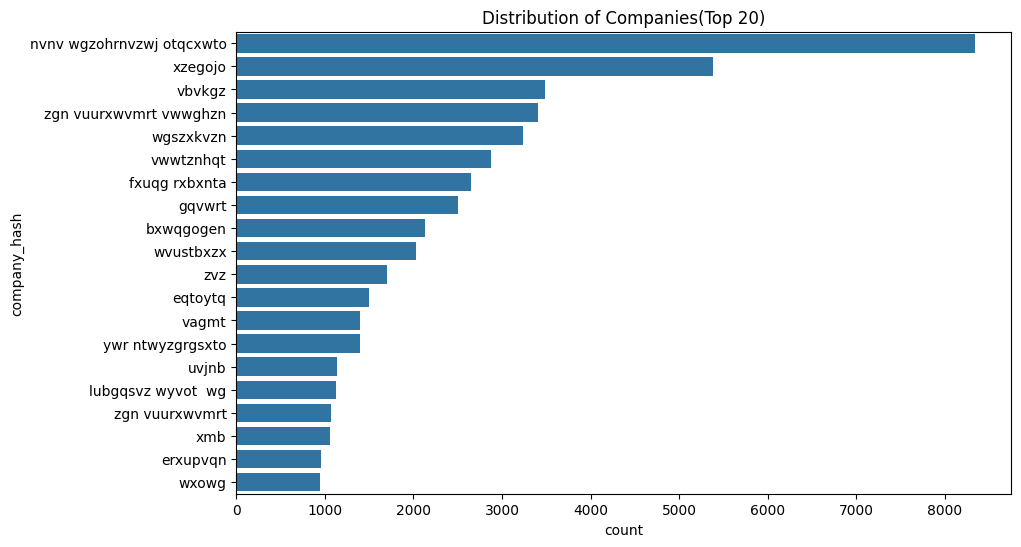

In [ ]:
# company_hash : display only top 20
plt.figure(figsize=(10,6))
plt.title(f'Distribution of Companies(Top 20)')

# get top 20 companies
top_companies = df['company_hash'].value_counts().head(20).index
sns.countplot(df[df['company_hash'].isin(top_companies)]['company_hash'], order=top_companies)
plt.show()

- ~8k learners are from single company, followed by ~5k

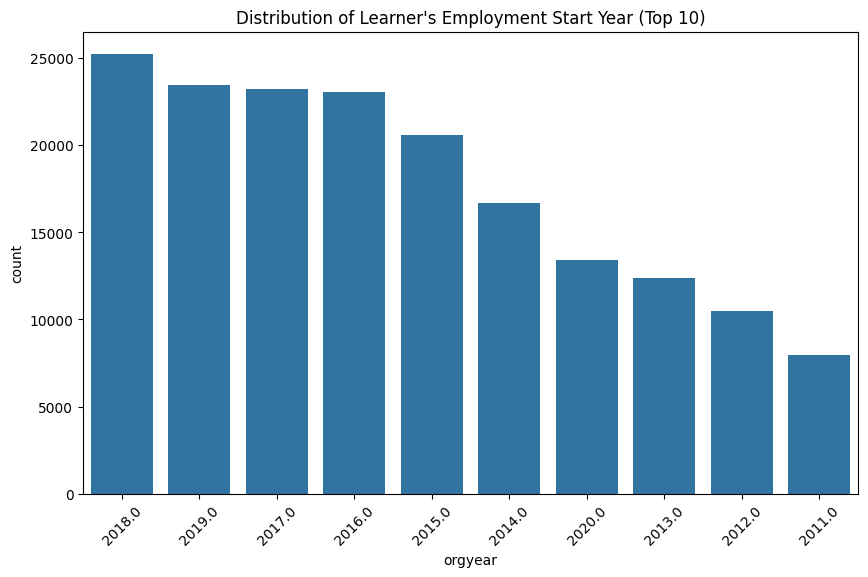

In [ ]:
# orgyear : display only top 10
plt.figure(figsize=(10,6))
plt.title(f"Distribution of Learner's Employment Start Year (Top 10)")
# get top 10 orgyear and their order
top_orgyear = df['orgyear'].value_counts().head(10).index
sns.countplot(x=df[df['orgyear'].isin(top_orgyear)]['orgyear'], order=top_orgyear)
plt.xticks(rotation=45)
plt.show()

- most learners ~25k started working in 2018 followed by ~24k in 2019

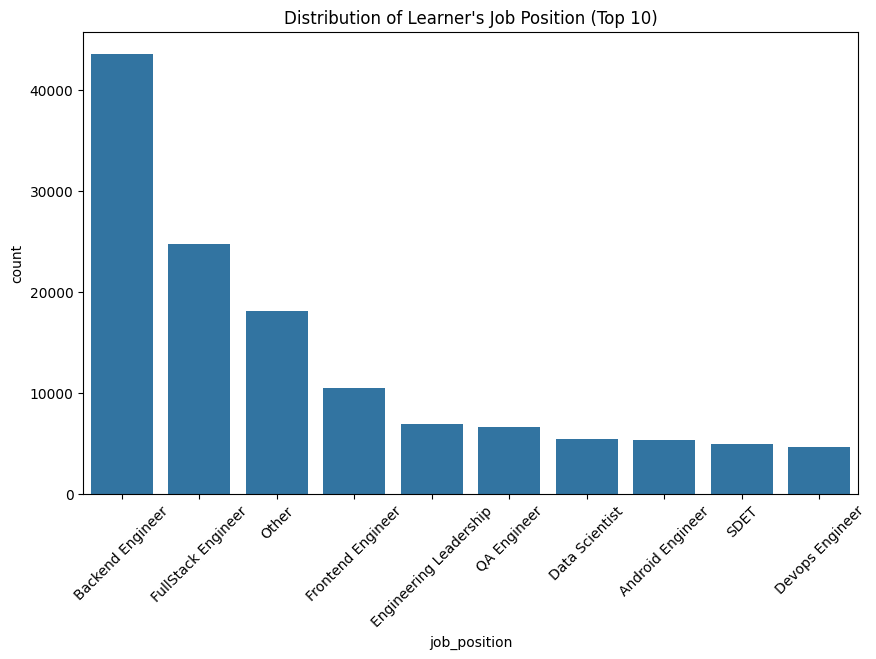

In [ ]:
# job_position : display only top 10
plt.figure(figsize=(10,6))
plt.title(f"Distribution of Learner's Job Position (Top 10)")
# get top 10 job_position and their order
top_job_position = df['job_position'].value_counts().head(10).index
sns.countplot(x=df[df['job_position'].isin(top_job_position)]['job_position'], order=top_job_position)
plt.xticks(rotation=45)
plt.show()

- most learners ~45k are backend engineers followed by ~ 25k full stack engineers

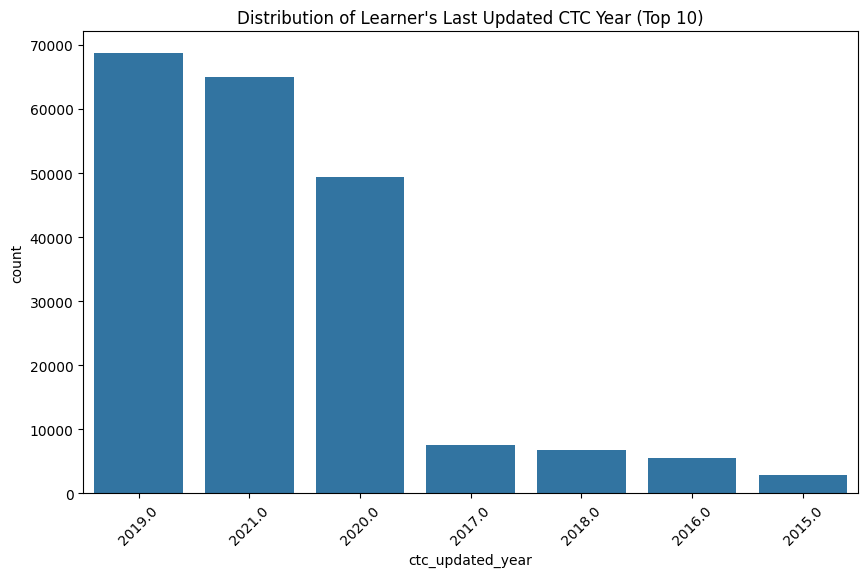

In [ ]:
# ctc_updated_year : display only top 10
plt.figure(figsize=(10,6))
plt.title(f"Distribution of Learner's Last Updated CTC Year (Top 10)")
# get top 10 ctc_updated_year and their order
top_ctc_updated_year = df['ctc_updated_year'].value_counts().head(10).index
sns.countplot(x=df[df['ctc_updated_year'].isin(top_ctc_updated_year)]['ctc_updated_year'], order=top_ctc_updated_year)
plt.xticks(rotation=45)
plt.show()

- most learners ~70k got their ctc updated in 2019 last, followed by ~65k in year 2021

## Missing value treatment

In [ ]:
# mode imputation for company_hash, orgyear and job_position

df['company_hash'].fillna(df['company_hash'].mode()[0], inplace=True)
df['orgyear'].fillna(df['orgyear'].mode()[0], inplace=True)
df['job_position'].fillna(df['job_position'].mode()[0], inplace=True)

df.isna().sum()

,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


- since company_hash, orgyear, job_position are all categorical features, we used mode imputation on them

### Cleaning Data

In [ ]:
# removing special chars from email_hash, company_hash and job_position

df['email_hash'] = df['email_hash'].str.replace('[^a-zA-Z0-9]', '', regex=True)
df['company_hash'] = df['company_hash'].str.replace('[^a-zA-Z0-9]', '', regex=True)
df['job_position'] = df['job_position'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [ ]:
# check for duplicates in data
df.duplicated().sum()

np.int64(8614)

In [ ]:
# removing duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

- we have removed 8614 duplicate datapoints from the data

### Outliers in Data

In [ ]:
# finding extreme outliers from orgyear
# orgyear not between 1950 and 2026

# Convert 'orgyear' to numeric type, coercing errors (e.g., from prior categorical conversion or bad data)
df['orgyear'] = pd.to_numeric(df['orgyear'], errors='coerce')

# Filter for values outside the desired range and display the relevant rows
print(df[(df['orgyear'] < 1950) | (df['orgyear'] > 2026)]['orgyear'].nunique())
print(df[(df['orgyear'] < 1950) | (df['orgyear'] > 2026)]['orgyear'].value_counts())

25
orgyear
0.0        17
3.0         6
2031.0      5
2029.0      5
91.0        3
2028.0      3
2.0         3
20165.0     2
1.0         2
6.0         2
5.0         2
2107.0      1
2101.0      1
208.0       1
2106.0      1
206.0       1
209.0       1
83.0        1
4.0         1
2027.0      1
2204.0      1
1900.0      1
38.0        1
201.0       1
200.0       1
Name: count, dtype: int64


- there are 25 orgyears that are not valid data points. We can remove these datapoints

In [ ]:
# removing extreme outliers from orgyear
df = df[(df['orgyear'] >= 1950) & (df['orgyear'] <= 2026)]
print(df[(df['orgyear'] < 1950) | (df['orgyear'] > 2026)]['orgyear'].nunique())

0


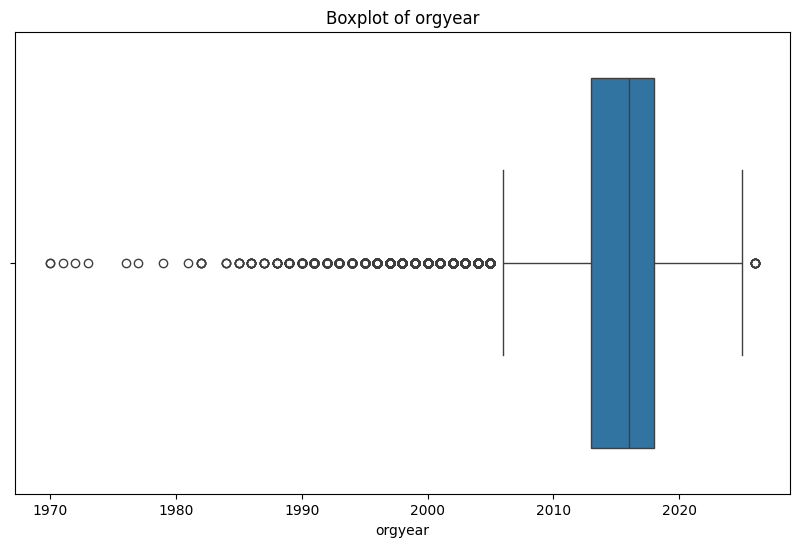

In [ ]:
# boxplot for orgyear
plt.figure(figsize=(10,6))
sns.boxplot(x=df['orgyear'])
plt.title('Boxplot of orgyear')
plt.show()

- averaging around 2018
- there are learners who have been working from 1970 as well, though this data might not be true.
- some learners have started working this year as well

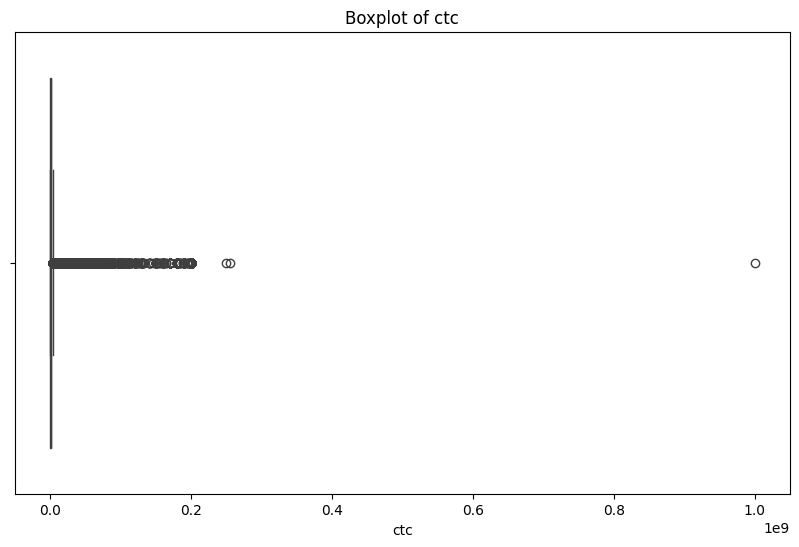

In [ ]:
# box plot of ctc
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ctc'])
plt.title('Boxplot of ctc')
plt.show()

In [ ]:
# Dropping outliers in ctc using LOF

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
df['lof'] = lof.fit_predict(df[['ctc']])
df[df['lof'] == -1]
print(f'Number of ctc outliers : {len(df[df['lof'] == -1])}')

df_new = df[df['lof'] == 1]
df_new.drop('lof', axis=1, inplace=True)
print(f'New df shape: {df_new.shape}')

Number of ctc outliers : 5418
New df shape: (191747, 6)


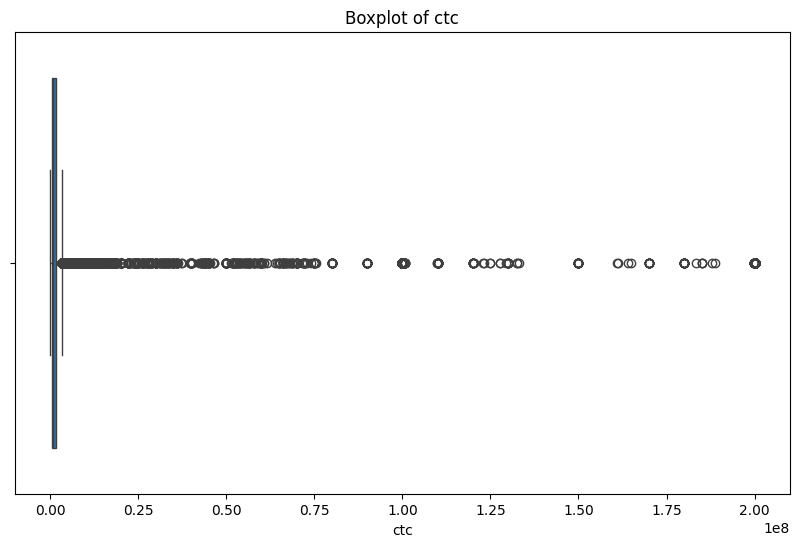

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_new['ctc'])
plt.title('Boxplot of ctc')
plt.show()

- ctc is still highly skewed even after outlier treatment
- this suggests that there are learners with much higher ctc than an average learner's ctc

In [ ]:
# IQR for ctc
Q1 = df_new['ctc'].quantile(0.25)
Q3 = df_new['ctc'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Outlier threshold: lower bound = {Q1-1.5*IQR}, upper bound = {Q3+1.5*IQR}")

Q1 (25th percentile): 530000.00
Q3 (75th percentile): 1650000.00
IQR: 1120000.00
Outlier threshold: lower bound = -1150000.0, upper bound = 3330000.0


- the lower bound doesn't seem reasonable
- based on our domain knowledge we can decide out lower bound and upper bounds.
- based on the data, we can keep lower bound = 1L and upper bound = 3Cr

In [ ]:
# Remove entries where ctc is below 1L and above 3Cr
df_new = df_new[(df_new['ctc'] >= 100000) & (df_new['ctc'] <= 30000000)]
df_new.shape

(186588, 6)

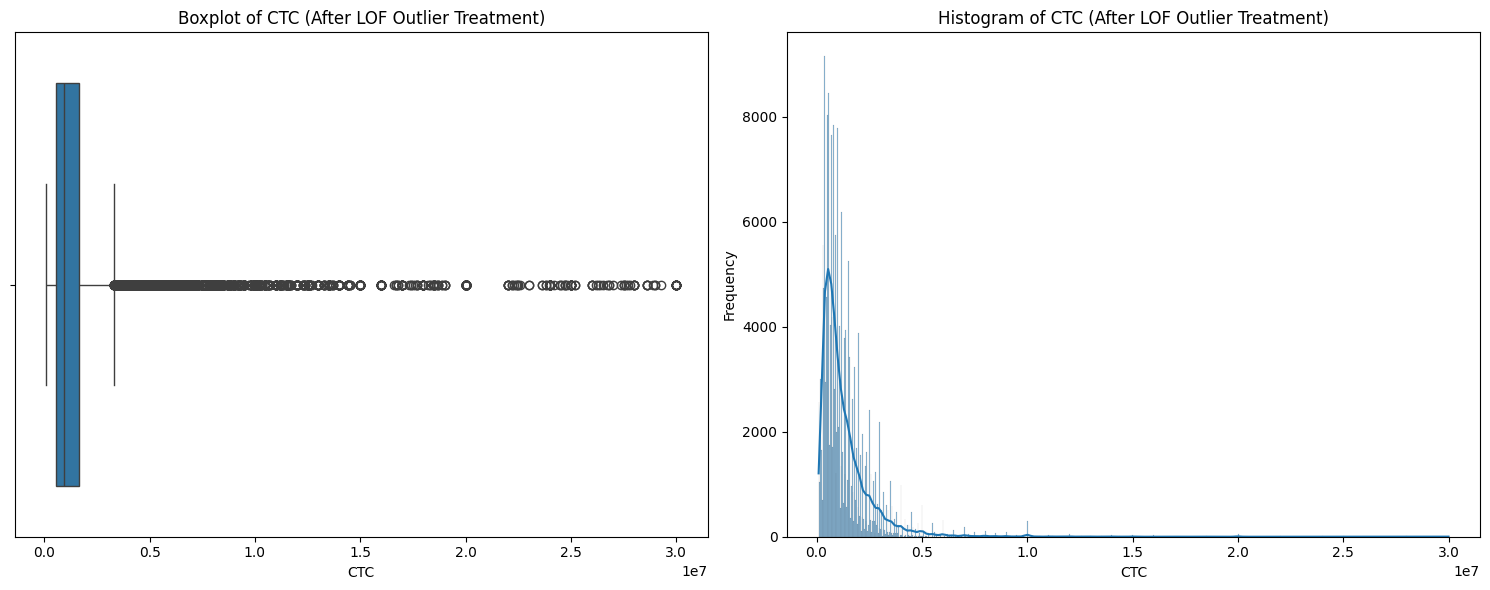

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot 1: Boxplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x=df_new['ctc'])
plt.title('Boxplot of CTC (After LOF Outlier Treatment)')
plt.xlabel('CTC')

# Subplot 2: Histogram
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df_new['ctc'], kde=True)
plt.title('Histogram of CTC (After LOF Outlier Treatment)')
plt.xlabel('CTC')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Feature Engineering

In [ ]:
# add new years of experience column
df_new['years_of_experience'] = 2026 - df_new['orgyear']
display(df_new['years_of_experience'].value_counts().sort_values(ascending=False).head(10))

,count
years_of_experience,
8.0,22883
7.0,21236
9.0,20912
10.0,20794
11.0,18698
12.0,15252
6.0,12360
13.0,11282
14.0,9595


- most learners ~24k have 8 years of experience, followed by 22k learners with 9 years of experience.
- top 10 learners are well experienced professionals, min being 6 yrs, max being 15 yrs

## Manual Clustering

### Creating Designation feature

In [ ]:
# ctc vs company_hash, job_position, years_of_experience
pd.set_option('display.float_format', '{:.2f}'.format) # Set display format to show floats with 2 decimal places
df_ctc = df_new.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])
display(df_ctc.sort_values(by='mean'))
pd.reset_option('display.float_format') # Reset display format to default after displaying

mean  \
company_hash                      job_position          years_of_experience               
mrq                               FullStackEngineer     12.00                 100000.00   
wgdvhngbgnxctxzw                  FullStackEngineer     10.00                 100000.00   
ogrhnxgzmhssj                     FullStackEngineer     12.00                 100000.00   
oxzshrvqxnxvx                     BackendEngineer       19.00                 100000.00   
cqhoyvrxxzegntwy                  Other                 9.00                  100000.00   
...                                                                                 ...   
vrzvootqwgbuvzj                   DatabaseAdministrator 8.00                30000000.00   
                                  BackendEngineer       8.00                30000000.00   
srgfonvq                          BackendEngineer       9.00                30000000.00   
mqvybvzxstbo                      ProductManager        25.00               30000000.00   
vuurtsggsrtbxwqgogenevwtmggpntorv BackendEngineer       6.00                30000000.00   

                                                                                 median  \
company_hash                      job_position          years_of_experience               
mrq                               FullStackEngineer     12.00                 100000.00   
wgdvhngbgnxctxzw                  FullStackEngineer     10.00                 100000.00   
ogrhnxgzmhssj                     FullStackEngineer     12.00                 100000.00   
oxzshrvqxnxvx                     BackendEngineer       19.00                 100000.00   
cqhoyvrxxzegntwy                  Other                 9.00                  100000.00   
...                                                                                 ...   
vrzvootqwgbuvzj                   DatabaseAdministrator 8.00                30000000.00   
                                  BackendEngineer       8.00                30000000.00   
srgfonvq                          BackendEngineer       9.00                30000000.00   
mqvybvzxstbo                      ProductManager        25.00               30000000.00   
vuurtsggsrtbxwqgogenevwtmggpntorv BackendEngineer       6.00                30000000.00   

                                                                                  max  \
company_hash                      job_position          years_of_experience             
mrq                               FullStackEngineer     12.00                  100000   
wgdvhngbgnxctxzw                  FullStackEngineer     10.00                  100000   
ogrhnxgzmhssj                     FullStackEngineer     12.00                  100000   
oxzshrvqxnxvx                     BackendEngineer       19.00                  100000   
cqhoyvrxxzegntwy                  Other                 9.00                   100000   
...                                                                               ...   
vrzvootqwgbuvzj                   DatabaseAdministrator 8.00                 30000000   
                                  BackendEngineer       8.00                 30000000   
srgfonvq                          BackendEngineer       9.00                 30000000   
mqvybvzxstbo                      ProductManager        25.00                30000000   
vuurtsggsrtbxwqgogenevwtmggpntorv BackendEngineer       6.00                 30000000   

                                                                                  min  \
company_hash                      job_position          years_of_experience             
mrq                               FullStackEngineer     12.00                  100000   
wgdvhngbgnxctxzw                  FullStackEngineer     10.00                  100000   
ogrhnxgzmhssj                     FullStackEngineer     12.00                  100000   
oxzshrvqxnxvx                     BackendEngineer       19.00                  100000   
cqhoyvrxxzegntwy       

In [ ]:
# designation feature based on ctc greater than avg of a learners company's department with same YOE

df_new['mean_ctc_company_position_yoe'] = df_new.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].transform('mean')

df_new['designation'] = 0
# set designation = 1 for above avg
df_new.loc[df_new['ctc'] > df_new['mean_ctc_company_position_yoe'], 'designation'] = 1

# set designation = 2 for avg
df_new.loc[df_new['ctc'] == df_new['mean_ctc_company_position_yoe'], 'designation'] = 2

# set designation = 3 for below avg
df_new.loc[df_new['ctc'] < df_new['mean_ctc_company_position_yoe'], 'designation'] = 3

# drop temporary mean column
df_new.drop('mean_ctc_company_position_yoe', axis=1, inplace=True)

print(df_new['designation'].value_counts())

designation
2    83277
3    60368
1    42943
Name: count, dtype: int64


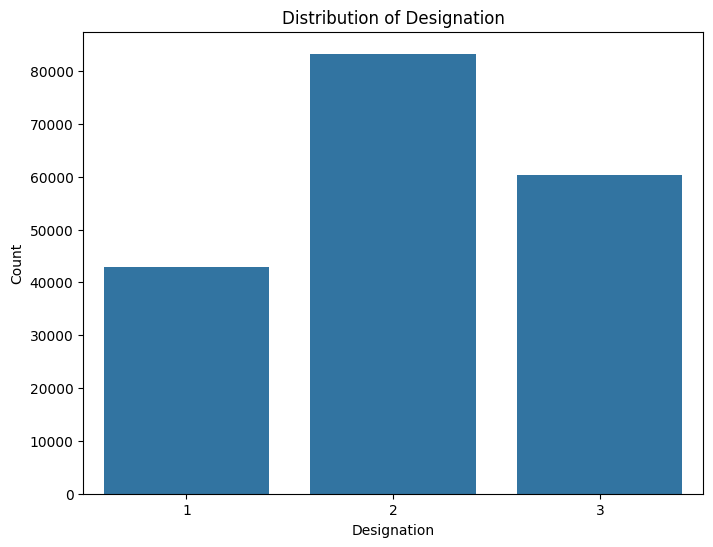

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_new['designation'])
plt.title('Distribution of Designation')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.show()

- around 84k learners are getting an average ctc for their position in their companies for their YOE
- ~43k are getting above avg and a big set of learners ~60k are getting below avg ctc

### Creating Class feature

In [ ]:
# ctc vs company_hash, job_position
pd.set_option('display.float_format', '{:.2f}'.format) # Set display format to show floats with 2 decimal places
df_ctc_2 = df_new.groupby(['company_hash', 'job_position'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])
display(df_ctc_2.sort_values(by='mean'))
pd.reset_option('display.float_format') # Reset display format to default after displaying

,,mean,median,max,min,count
company_hash,job_position,,,,,
nqxztn,BackendEngineer,100000.00,100000.00,100000,100000,1
sgctqzbtznugrjntwyzxwwgrrtst,Other,100000.00,100000.00,100000,100000,1
wod,FullStackEngineer,100000.00,100000.00,100000,100000,1
ovznvzatqmvzpzv,BackendEngineer,100000.00,100000.00,100000,100000,1
ovzopqhnxntwyzgrgsj,QAEngineer,100000.00,100000.00,100000,100000,1
...,...,...,...,...,...,...
srgfonvq,BackendEngineer,30000000.00,30000000.00,30000000,30000000,1
vrzvootqwgbuvzj,BackendEngineer,30000000.00,30000000.00,30000000,30000000,1
vo,FrontendEngineer,30000000.00,30000000.00,30000000,30000000,1


In [ ]:
# class feature based on ctc greater than avg of a learners company's department

df_new['mean_ctc_company_position'] = df_new.groupby(['company_hash', 'job_position'])['ctc'].transform('mean')

df_new['class'] = 0
# set designation = 1 for above avg
df_new.loc[df_new['ctc'] > df_new['mean_ctc_company_position'], 'class'] = 1

# set designation = 2 for avg
df_new.loc[df_new['ctc'] == df_new['mean_ctc_company_position'], 'class'] = 2

# set designation = 3 for below avg
df_new.loc[df_new['ctc'] < df_new['mean_ctc_company_position'], 'class'] = 3

# drop temporary mean column
df_new.drop('mean_ctc_company_position', axis=1, inplace=True)

print(df_new['class'].value_counts())

class
3    83304
1    54128
2    49156
Name: count, dtype: int64


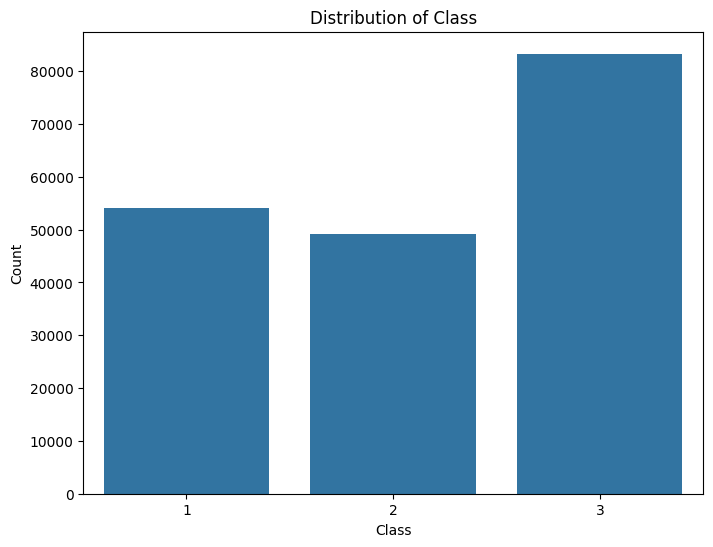

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_new['class'])
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- there's a huge set of learners ~82k earning below avg for their position in the company
- 55k are earning avg while 49k are earning above avg as per their position in the company

### Creating Tier feature

In [ ]:
# ctc vs company_hash
pd.set_option('display.float_format', '{:.2f}'.format) # Set display format to show floats with 2 decimal places
df_ctc_3 = df_new.groupby(['company_hash'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])
display(df_ctc_3.sort_values(by='mean'))
pd.reset_option('display.float_format') # Reset display format to default after displaying

,mean,median,max,min,count
company_hash,,,,,
pttzygbtxzw,100000.00,100000.00,100000,100000,1
mvrrtmvvk,100000.00,100000.00,100000,100000,1
otcxntwyojontbo,100000.00,100000.00,100000,100000,1
mqvxzonvnxgz23rna,100000.00,100000.00,100000,100000,2
vwnxctrgsxwvrxetowxtzwtxzzgcvnxgzoucnrna,100000.00,100000.00,100000,100000,1
...,...,...,...,...,...
vrzvootqwgbuvzj,30000000.00,30000000.00,30000000,30000000,2
srgfonvq,30000000.00,30000000.00,30000000,30000000,1
vo,30000000.00,30000000.00,30000000,30000000,1


In [ ]:
# tier feature based on ctc greater than avg of a learners company

df_new['mean_ctc_company'] = df_new.groupby(['company_hash'])['ctc'].transform('mean')

df_new['tier'] = 0
# set designation = 1 for above avg
df_new.loc[df_new['ctc'] > df_new['mean_ctc_company'], 'tier'] = 1

# set designation = 2 for avg
df_new.loc[df_new['ctc'] == df_new['mean_ctc_company'], 'tier'] = 2

# set designation = 3 for below avg
df_new.loc[df_new['ctc'] < df_new['mean_ctc_company'], 'tier'] = 3

# drop temporary mean column
df_new.drop('mean_ctc_company', axis=1, inplace=True)

print(df_new['tier'].value_counts())

tier
3    98163
1    59016
2    29409
Name: count, dtype: int64


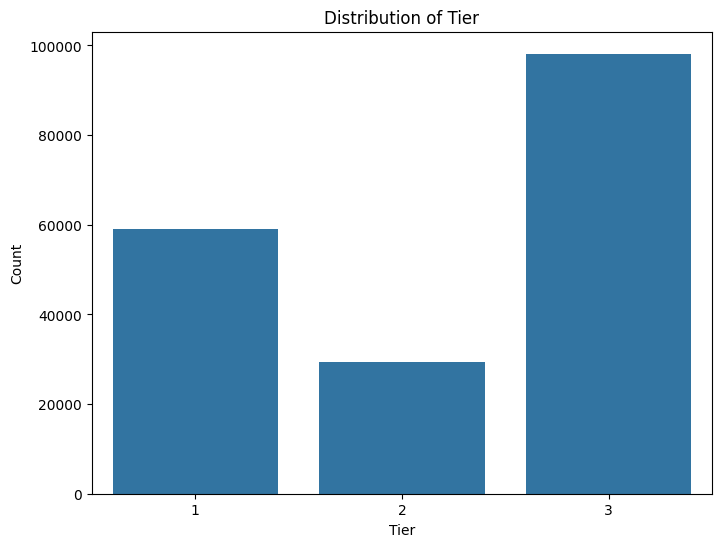

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_new['tier'])
plt.title('Distribution of Tier')
plt.xlabel('Tier')
plt.ylabel('Count')
plt.show()

- an even bigger number of learners ~1L are earning below avg ctc in their companies
- a good set of 60k are earning above avg while 29k are earning avg ctc

### Designation vs Class

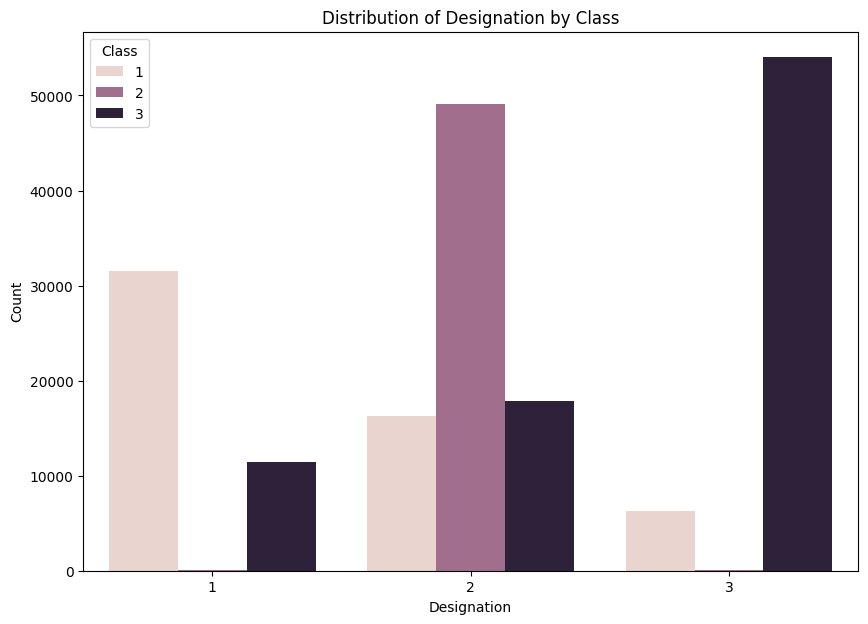

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df_new['designation'], hue=df_new['class'])
plt.title('Distribution of Designation by Class')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

- designation 1: above 30k class 1 earn above avg and some ~10k class 3 are also earning above avg
- designation 2: trend of a notable portion of avg class and avg designation is visible, however there are ~18k learners of class 1 and ~19k of class 3 earning avg
- designation 3: ~55k class 3 learners are earning below avg, along with few ~6k class 1 earning below avg ctc

### Designation vs Tier



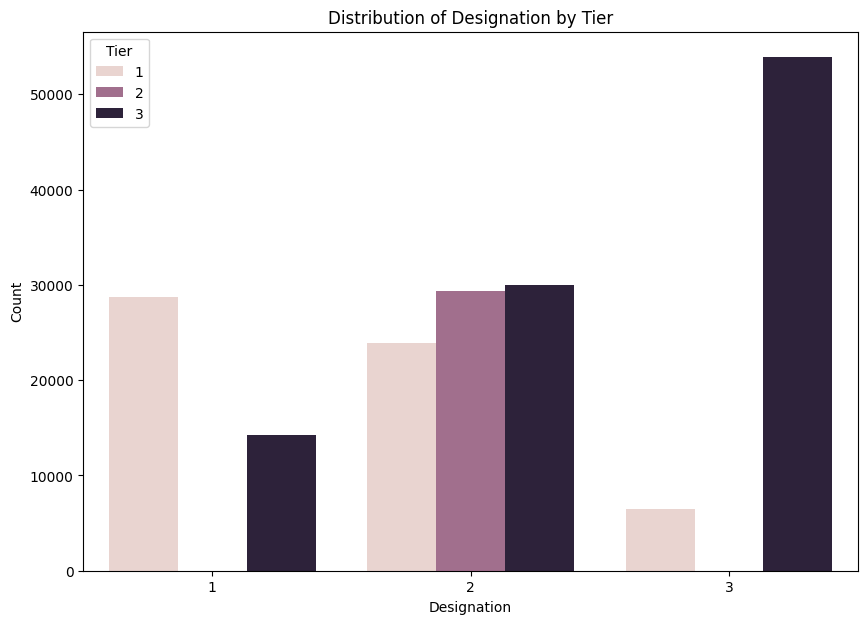

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df_new['designation'], hue=df_new['tier'])
plt.title('Distribution of Designation by Tier')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.legend(title='Tier')
plt.show()

- designation 1: ~30k tier 1 earn above avg and above 13k are earning above avg as well
- designation 2: tier is distributed similarly for designation 2, indicating learners are earning avg ctc across companies
- designation 3:  more than 55k tier 3 learners are earning below avg, along with few ~6k tier 1 earning below avg ctc

### Class vs Tier


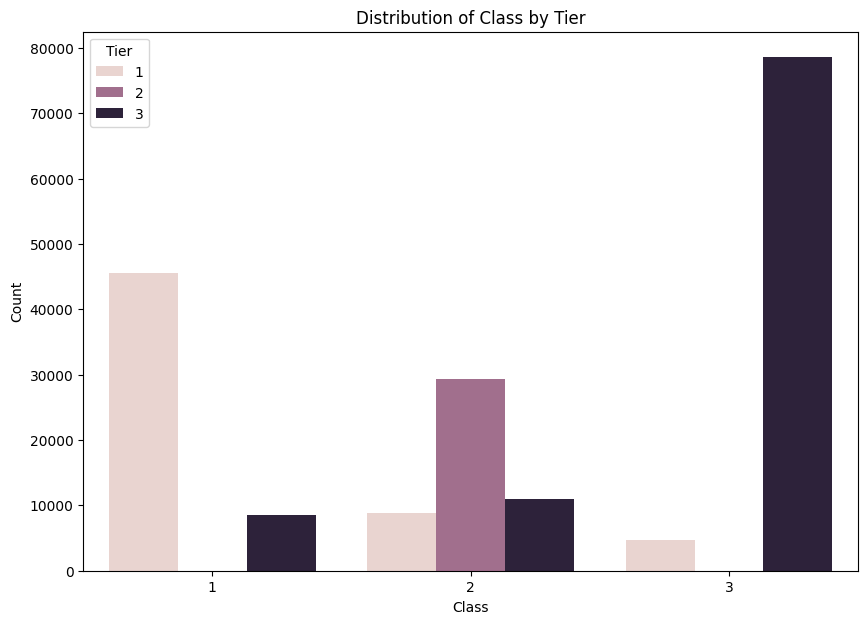

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df_new['class'], hue=df_new['tier'])
plt.title('Distribution of Class by Tier')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Tier')
plt.show()

- same pattern can be observed for class 3 as the above graphs. This shows that most learners are earning below avg ctc for their companies, positions and YOE.
- class 1 is composed of mainly tier 1. This pattern is also consistent with designation indicating that a few learners are earning above avg for their companies with specific job positions and YOE
- there is a trend of companies sticking to avg pay for tier 2 and class 2 learners

### Based on Manual Clustering, we answer the following questions

1. Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
# top 10 tier 1 employees who earn more than other company employees
df_new[df_new['tier'] == 1].sort_values(by='ctc', ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
204415,uhmrxwxoovuxtzn,7e1328a96c0aac85b355e192cf7437679cfa969a00abd3...,2008.0,30000000,BackendEngineer,2021.0,18.0,2,1,1
11536,vuurtsggsrtbxwqgogenevwtmggpntorv,dc94481e0770e6f99f7c2a1f878cc3ca32218835688716...,2020.0,30000000,BackendEngineer,2019.0,6.0,2,1,1
98759,lhzxutqztnfgqpo,14c1588f66c0c47dc710b6c515579a2f6313a9ee7210f7...,1999.0,30000000,BackendEngineer,2019.0,27.0,2,1,1
34080,fxuqgrxbxnta,482cc2d45dca510bd4ac728ee19bbd1647333499302e8b...,2021.0,30000000,EngineeringLeadership,2021.0,5.0,2,1,1
65150,xxblgmowgb,b1d378c620e2bbdfdf68bb879808a61f418e527ca68a5f...,2018.0,30000000,FullStackEngineer,2021.0,8.0,2,2,1
161056,zgnvuurxwvmrtvwwghzn,6fa4c9b258d95a198451ddc779ea9534649f4917198884...,2003.0,30000000,EngineeringLeadership,2021.0,23.0,1,1,1
6413,nvnvwgzohrnvzwjotqcxwto,92e74560ace875ff0046b22e57fd7138557ab6d2f29881...,2015.0,29300000,DataAnalyst,2020.0,11.0,1,1,1
24291,tdurtg,172f0f70b2d3bad096f19d8a8ff91f4fe2c5cb5f547191...,2011.0,29000000,QAEngineer,2020.0,15.0,2,1,1
57213,zgnvuurxwvmrtvwwghzn,3a75a0ab6d2cfffd158e6b1f761229e95b542ca456cdac...,2008.0,29000000,ProductManager,2021.0,18.0,2,1,1
204399,zgnvuurxwvmrt,39427aebb6b1e66fcf5d613f921a525b27582324daffda...,2020.0,28600000,BackendEngineer,2019.0,6.0,1,1,1


- we can see that these employees earn 50L
- most learners are backend engineers, followed by Engineering leadership
- YOE ranges from 4 yrs to 25 yrs
- few learners are getting paid avg as per their YOE in their job positions

1.1 Top 10 employees of data science in each company earning more than their peers - Class 1

In [ ]:
df_new.job_position.str.contains('DataScientist', case=False).sum()

np.int64(5141)

- there are around 5161 data scientists in our dataset

In [ ]:
# top 10 class 1 employees of data science who earn more than their peers
data_scientists = df_new[df_new['job_position']=='DataScientist']
data_scientists[data_scientists['class'] == 1].sort_values(by='ctc', ascending=False).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
173187,wxnx,f7b7c771ccdbbca7248002ba83f7a176baa974c2c7bb8f...,2011.0,24200000,DataScientist,2020.0,15.0,2,1,1
77879,bxwqgogen,599e489c815ba51967965c5d6adefd7a76a99ffaa129bd...,2002.0,22500000,DataScientist,2019.0,24.0,2,1,1
9930,sggsrt,3e290b892b73283b96293c53e4ce4dce2cc6a22399b95c...,2023.0,22000000,DataScientist,2020.0,3.0,2,1,1
25547,xmb,b5dc6ad6d8d8f04312c34285a3c45fd9ffdc73ff3f1205...,2011.0,20000000,DataScientist,2020.0,15.0,1,1,1
72489,zvz,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,2017.0,20000000,DataScientist,2020.0,9.0,2,1,1
189171,onvntonqttn,9fdab215a86b0e2f18ee6c3d7653442cd7ad8b9cc4cf91...,2016.0,18000000,DataScientist,2019.0,10.0,2,1,1
85545,mgtxzs,6b6466eb7dec3b55b8758b7850b9ca2ff562c4f7e654fa...,2019.0,12000000,DataScientist,2020.0,7.0,2,1,1
131594,sgltp,24d6a653ce21e80d3f03eaab9b7600f4bbb0888cf7bccd...,2005.0,12000000,DataScientist,2018.0,21.0,2,1,1
167223,fvrbvqnrvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,DataScientist,2020.0,8.0,2,1,1
26230,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,DataScientist,2020.0,13.0,2,1,1


- we find that top paid data scientists earn 50L
- these highly paid learners might have demonstrated extraordinary skills including other factors like college they graduated from, or specialized masters/phd degrees etc
- their YOE ranges from 7 to 26 yrs
- most of them are paid avg ctc as per their YOE in their companies


1.2 Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [ ]:
# bottom 10 class 1 employees of data science who earn less than their peers
data_scientists[data_scientists['class'] == 1].sort_values(by='ctc', ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
70879,urhbxzw,89c50595727487bfa7d687bb168d2c2b55a57646876a4d...,2017.0,155000,DataScientist,2018.0,9.0,1,1,1
125156,xzatrrxtzn,cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...,2018.0,180000,DataScientist,2019.0,8.0,1,1,1
126770,phnnvzvavz,db494a7dc655b62838d1941ad59b4630422ee8c9251e55...,2019.0,340000,DataScientist,2019.0,7.0,1,1,1
100127,xvbzgnfgqpxzs,a25f089d0a28733e5f5ccc4f9a1a9ad8a4ea8fe53e8575...,2014.0,400000,DataScientist,2019.0,12.0,2,1,3
35844,xzthqgzvx,2ac23890a2d35956df1f5b0a78a28e2df4ef32554d6a9b...,2018.0,400000,DataScientist,2021.0,8.0,2,1,1
190755,exctqq,d89d0dd7e1ba7a79aea715fcfea34ee9c0525b746a5da6...,2016.0,400000,DataScientist,2020.0,10.0,2,1,3
85364,tdvwnouvwt,9e457f9c8a805335d137d19aeab22cfcd99ee0d660fbbd...,2018.0,420000,DataScientist,2020.0,8.0,1,1,1
192129,tdvwnouvwt,9e457f9c8a805335d137d19aeab22cfcd99ee0d660fbbd...,2018.0,420000,DataScientist,2019.0,8.0,1,1,1
152489,fyxntyvnlq,a7e807d790ad3b7e56de5a785f0abc26e2f2fb0ef24c10...,2018.0,480000,DataScientist,2021.0,8.0,2,1,3
187369,nvnqvoavnvotqcxwto,5a6bb301b8026e0f0ee2e458b85cb7d8d7ec4e4fad9ed0...,2019.0,500000,DataScientist,2019.0,7.0,1,1,1


- we find that lowest ctc is around 1.5L and goes upto 5L in our bottom 10 paid data scientists
- even though their YOE is as high as 12 years as well, this might indicate a possible career switch, maybe from non-technical or even a different tech stack to data science.
- we can see that some of them are paid below avg in the company but paid avg for their YOE in their companies

2. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
# bottom 10 tier 3 employees who earn less than other company employees
df_new[df_new['tier'] == 3].sort_values(by='ctc', ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
7710,sttpoegqsttpo,872ff73ee682b81f074f2744f91377930f3f5ec96b2a7d...,2021.0,100000,BackendEngineer,2020.0,5.0,3,3,3
13246,onhatzn,a58e6b21db9a2e05a44ed3eb1916a1373a0f8350dd25c3...,2021.0,100000,FullStackEngineer,2020.0,5.0,3,3,3
36448,zgnvuurxwvmrtvwwghzn,1941c5a72a78b51d0441e3d78ac82bc40d0005a29671f5...,2020.0,100000,BackendEngineer,2021.0,6.0,3,3,3
36519,eqtoytq,eb33329279cc03ab55a480c9c2dfb50b1ff3f12ee48b88...,2017.0,100000,BackendEngineer,2019.0,9.0,3,3,3
41333,nvnvwgzohrnvzwjotqcxwto,1ab28996685da8bafa7ec56519ea9d8be3adb38c584b3b...,2018.0,100000,Other,2021.0,8.0,3,3,3
58921,zvz,aaeeea749481ee58ad2cd4d86a65dbac6b375d55db1f80...,2021.0,100000,Other,2020.0,5.0,3,3,3
150771,erxupvqn,81a1219e43c6a7190ac19c95b67e25ff629a74d4d4c8ff...,2019.0,100000,BackendEngineer,2021.0,7.0,3,3,3
58891,onvzavqawyvqntqtamvzp,d449031ef644843d3992ad45507da5c79b510a1ea2e369...,2004.0,100000,Other,2020.0,22.0,2,3,3
134656,sggsrt,5e1333d02c8174fdae16be140f06cff96cdec1e174e10a...,2014.0,100000,BackendEngineer,2015.0,12.0,3,3,3
33978,xzaxvzxzonxnhntgentwyzgrgsjatryx,367becc16080399cca46021e91eca21f84fe6fb55bc4e3...,2021.0,100000,BackendEngineer,2020.0,5.0,2,2,3


- we can see that all the least paid employees are paid as low as 1L
- 3 are full stack engineers and 2 are backend engineers. There's also an engineering intern and a support engineer. 3 job positions are marked other so we will consider them unknown
- YOE vary from 3 yrs to 12 years
- here also we can assume that learners might have switched careers after working in a different field/domain. For example the engineering intern has 9 years of experience which doesn't align with their role

3. Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
# top 10 employees in each company with data science deparment
# YOE = 5, 6 or 7 with Tier 1
yoe = df_new[(df_new['years_of_experience'].isin([5,6,7])) & (df_new['job_position']=='DataScientist')]
yoe[yoe['tier'] == 1].sort_values(by='ctc', ascending=False).head(10)


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
85545,mgtxzs,6b6466eb7dec3b55b8758b7850b9ca2ff562c4f7e654fa...,2019.0,12000000,DataScientist,2020.0,7.0,2,1,1
85469,zgnvuurxwvmrtvwwghzn,1ff756b1855c0faa035c7873dee21d01a6d4b2cb18f0eb...,2021.0,10000000,DataScientist,2021.0,5.0,1,1,1
40633,xzntqwgznxztznvrtdwyvzst,4ac1672918f72b8e53d469046e33a947acf74c02fe489f...,2019.0,8500000,DataScientist,2020.0,7.0,2,2,1
197200,ihtonsrgmvr,aefccb2657f861f5da9869b0570f1797ce76b65aa5c7f5...,2020.0,8400000,DataScientist,2019.0,6.0,2,1,1
166035,rtdxoztdxo,83b63b7b67a1845d1c29296d19ff6c47b7b96442f3c99f...,2019.0,6000000,DataScientist,2019.0,7.0,2,1,1
300,ihvrwgbb,5e00ddb58e2de8f6a53a9bf0fb1b0bfbd29775203696f7...,2019.0,6000000,DataScientist,2019.0,7.0,2,1,1
13998,gzturho,3b00cdb9fa05b59d50c01a3d069ae4cf7485d3d25bd080...,2019.0,5500000,DataScientist,2020.0,7.0,2,2,1
201378,ovbohzsqaxzonxnhntxzaxvmvzsvrgqt,ebe30d09946bf7d1d351ae5004cc40ac1e220cce01cd09...,2020.0,5000000,DataScientist,2019.0,6.0,1,1,1
153851,bxwqgogen,df9b9ba4fbea98e5688a3b7b949c0048540a852674cd10...,2020.0,4330000,DataScientist,2020.0,6.0,1,1,1
154312,ntqvavnvwgqugqvnxgz,90ec934eced7df9070fbc0dec9e0df667b4138dbf5fe71...,2019.0,4300000,DataScientist,2019.0,7.0,2,1,1


- ctc ranges from 12L to 4.3L
- most learners are earning avg according to their YOE in the company

4. Top 10 companies (based on their CTC)

In [ ]:
# top 10 companies based on ctc offered
df_new.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)

,ctc
company_hash,
xzehbxzntwyzgrgsjrru,30000000.0
mqvybvzxstbo,30000000.0
jghquqvwnxwtgzrxztucnrna,30000000.0
srgfonvq,30000000.0
vo,30000000.0
vrzvootqwgbuvzj,30000000.0
ntrtutqegqbvzwtlvxuhq,28900000.0
mqtvpnyqghsy,28600000.0
nqxumqvzaontwyzgrgsjucnrna,28000000.0


 - highest ctc offered of 3cr by 6 companies


## Unsupervised Clustering

Performing encoding on categorical data

In [ ]:
# Doing encoding on categorical data
from sklearn.preprocessing import LabelEncoder

# Drop email_hash as it is not useful for clustering
df_enc = df_new.drop('email_hash', axis=1)

# One-Hot Encoding for ctc_updated_year
df_enc = pd.get_dummies(df_enc, columns=['ctc_updated_year'], prefix='ctc_updated',dtype=int)

# Frequency Encoding for company_hash and job_position
company_frequency = df_enc['company_hash'].value_counts(normalize=True)
df_enc['company_hash_freq'] = df_enc['company_hash'].map(company_frequency)

job_position_frequency = df_enc['job_position'].value_counts(normalize=True)
df_enc['job_position_freq'] = df_enc['job_position'].map(job_position_frequency)

# Drop original high-cardinality columns after frequency encoding
df_enc.drop(['company_hash', 'job_position'], axis=1, inplace=True)

df_enc.head()

,orgyear,ctc,years_of_experience,designation,class,tier,ctc_updated_2015.0,ctc_updated_2016.0,ctc_updated_2017.0,ctc_updated_2018.0,ctc_updated_2019.0,ctc_updated_2020.0,ctc_updated_2021.0,company_hash_freq,job_position_freq
0,2016.0,1100000,10.0,2,1,1,0,0,0,0,0,1,0,0.000043,0.089979
2,2015.0,2000000,11.0,2,1,1,0,0,0,0,0,1,0,0.000021,0.445264
3,2017.0,700000,9.0,3,3,3,0,0,0,0,1,0,0,0.000354,0.445264
4,2017.0,1400000,9.0,2,1,1,0,0,0,0,1,0,0,0.000032,0.123448
5,2018.0,700000,8.0,2,2,3,0,0,0,0,0,1,0,0.000032,0.123448


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_enc)
df_scaled = pd.DataFrame(df_scaled, columns=df_enc.columns)
df_scaled.head()

,orgyear,ctc,years_of_experience,designation,class,tier,ctc_updated_2015.0,ctc_updated_2016.0,ctc_updated_2017.0,ctc_updated_2018.0,ctc_updated_2019.0,ctc_updated_2020.0,ctc_updated_2021.0,company_hash_freq,job_position_freq
0,0.208598,-0.170354,-0.208598,-0.126504,-1.370326,-1.353985,-0.119407,-0.163188,-0.189376,-0.182308,-0.718976,1.769379,-0.670832,-0.496603,-0.721765
1,-0.027815,0.451436,0.027815,-0.126504,-1.370326,-1.353985,-0.119407,-0.163188,-0.189376,-0.182308,-0.718976,1.769379,-0.670832,-0.498897,1.100884
2,0.445012,-0.446705,-0.445012,1.228112,0.999730,0.884368,-0.119407,-0.163188,-0.189376,-0.182308,1.390867,-0.565170,-0.670832,-0.463336,1.100884
3,0.445012,0.036910,-0.445012,-0.126504,-1.370326,-1.353985,-0.119407,-0.163188,-0.189376,-0.182308,1.390867,-0.565170,-0.670832,-0.497750,-0.550064
4,0.681425,-0.446705,-0.681425,-0.126504,-0.185298,0.884368,-0.119407,-0.163188,-0.189376,-0.182308,-0.718976,1.769379,-0.670832,-0.497750,-0.550064


### 1. K-Means Clustering

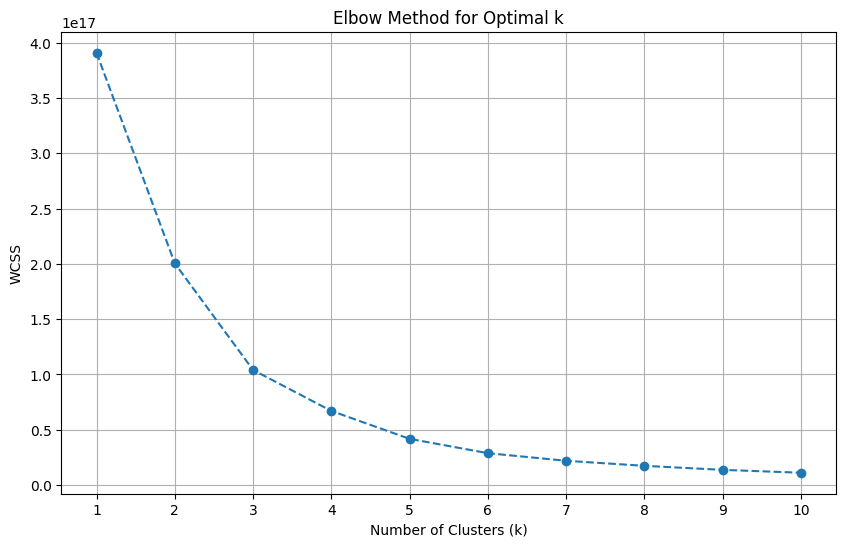

In [ ]:
# getting optimal k using elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_enc)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


- we will take the optimal k to be 4

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_enc)
df_new['kmeans'] = kmeans.predict(df_enc)

df_new['kmeans'].value_counts()


,count
kmeans,
0,149985
1,35184
2,1419


In [ ]:
149985/(149985+35184+1419)

0.8038298282847771

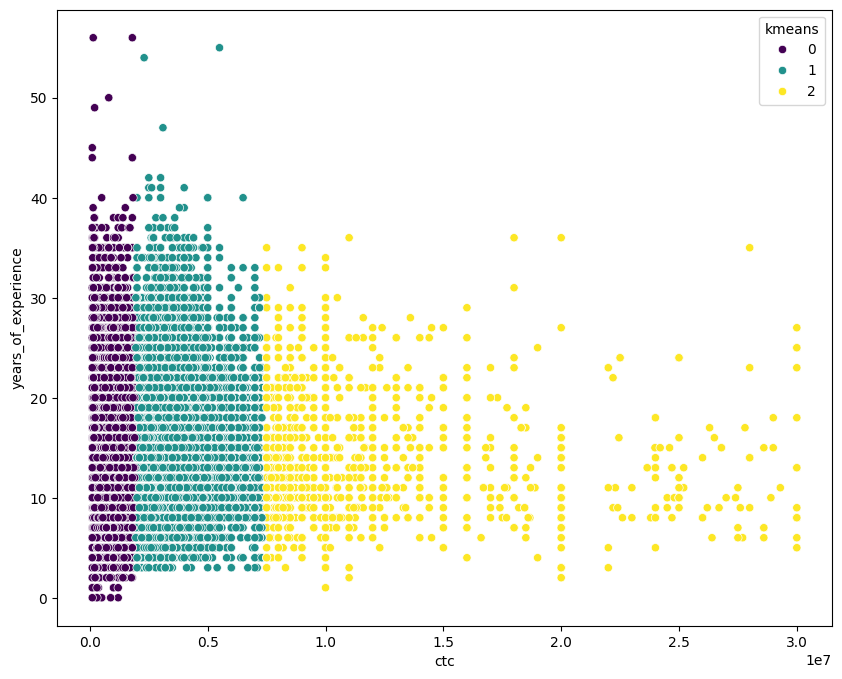

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ctc', y='years_of_experience', hue=df_new['kmeans'], data=df_new, palette='viridis', legend='full')
plt.show()

- we see that there is a clear pattern between the 3 clusters with ctc irrespective of the years of exp

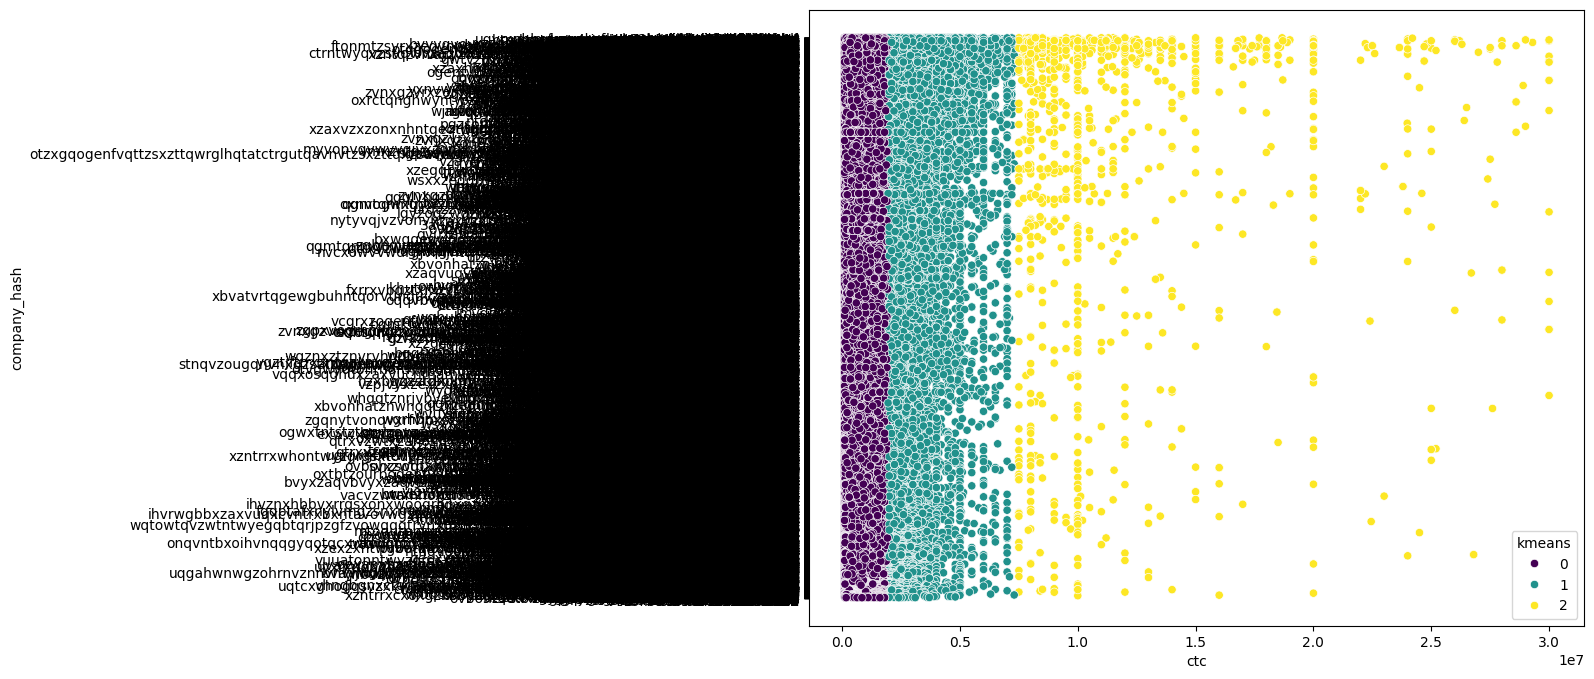

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ctc', y='company_hash', hue=df_new['kmeans'], data=df_new, palette='viridis', legend='full')
plt.show()

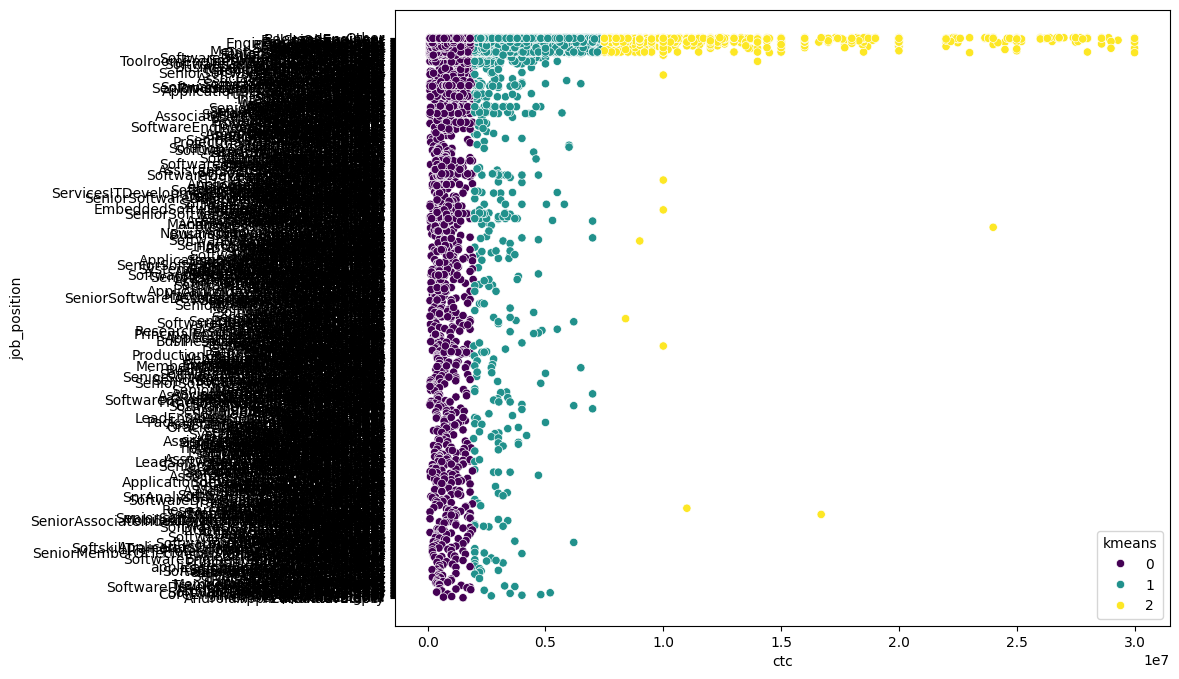

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ctc', y='job_position', hue=df_new['kmeans'], data=df_new, palette='viridis', legend='full')
plt.show()

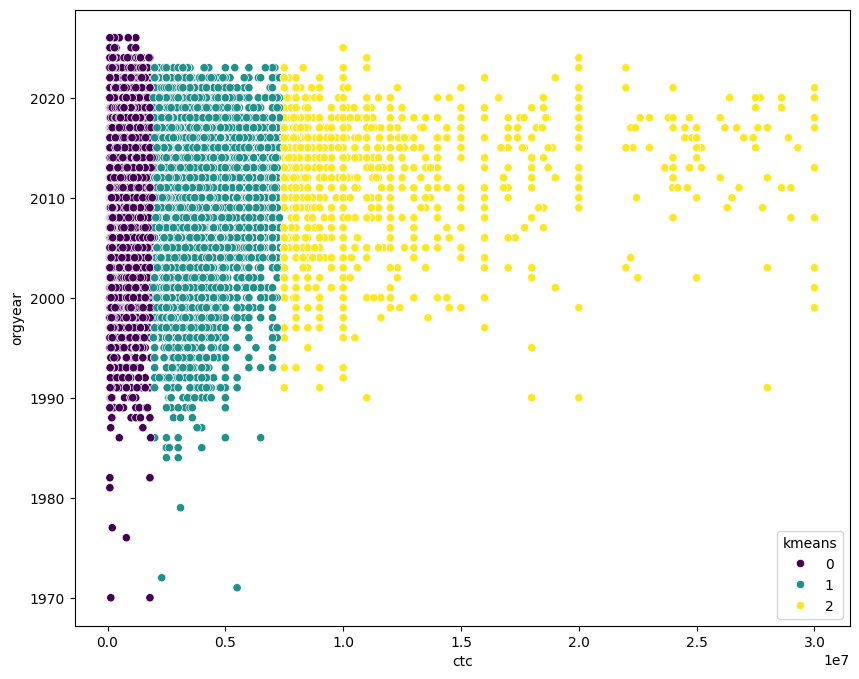

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ctc', y='orgyear', hue=df_new['kmeans'], data=df_new, palette='viridis', legend='full')
plt.show()

- Kmeans have clustered the data based on ctc as seens in all the above plots

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_enc, df_new['kmeans'])

print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.68


- silhouette score of 0.68 signifies that the clusters are well-separated and distinct
- the data points within each cluster are relatively close to each other (cohesion) and quite far from data points in other clusters (separation)

### PCA for visualization

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_enc)
clusters = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
clusters['label'] = df_new['kmeans']
clusters.head(5)

,PC1,PC2,label
0,-246575.529863,0.897264,0.0
1,653424.470138,0.597109,NaN
2,-646575.529866,1.885635,1.0
3,53424.470135,2.654626,0.0
4,-646575.529867,3.305411,0.0


Text(0.5, 1.0, 'Visualizing Clusters using PCA')

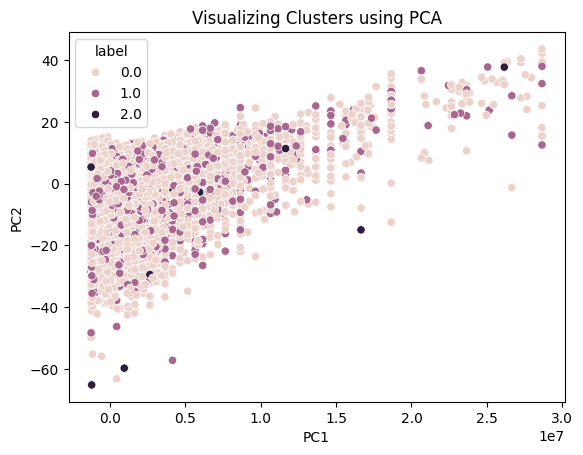

In [ ]:
sns.scatterplot(data=clusters,x='PC1', y='PC2', hue=clusters['label'],legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualizing Clusters using PCA')

- Clusters are not clearly separated between PC1 and PC2
- both PC1 and PC2 seems to be capturing the data variance well enough.

### 2. Hierarchical Clustering

- we will use df_pca instead of df_enc because the runtime for df_enc will be very high

In [ ]:
# performing aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
# ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit_predict(df_pca)
# df_new['hierarchical'] = ac.labels_
# df_new['hierarchical'].value_counts()


- not able to run agglomerative clustering as it uses all availble colab's RAM and RAM keeps crashing

In [ ]:
# Avg ctc across different job positions
df_avg_ctc = df_new.groupby('job_position')['ctc'].mean().sort_values(ascending=False)
df_avg_ctc.head(10)

,ctc
job_position,
ComputerFaculty,24000000.0
ApplicationsEngineer2,16700000.0
SecurityIntern,11000000.0
Toyota,10000000.0
Electricpowersupply,10000000.0
PhDStudent,8400000.0
AssociateDirectorOnlineProducts,7000000.0
SeniorManagerOnlineProducts,7000000.0
SoftwareDevelopmentEngineerIV,6200000.0


In [ ]:
# min, max, mean of each cluster
pd.set_option('display.float_format', '{:.2f}'.format)
display(df_new.groupby('kmeans')['ctc'].agg(['min', 'max', 'mean', 'count']))
pd.reset_option('display.float_format')

,min,max,mean,count
kmeans,,,,
0,100000,1930000,858434.15,149985
1,1939999,7300000,3007109.87,35184
2,7500000,30000000,11769158.56,1419




---
## Insights:

1. largest cluster has around 80% of the learners
2. cluster info :
  - cluster 0 ranges from ctc of 1L to ~19L with mean of ~8.5L. This is the cluster with most learners(80%)
  - cluster 1 ranges from ctc of ~19.4L to 73L. This cluster has 18% of learners
  - cluster 2 ranges from ctc of 75L to 3Cr. This cluster has only 0.76% of the learners
  - the clusters are highly imbalanced in nature indicating most learners are paid below avg
3. as we see from the ctc vs YOE scatter plot, the ctc does not necessarily increase with YOE, the ctc rather seems to be role/skill based
4. Backend Engineers across companies seems to be earning a wide variety of ctcs from the lowest 1L to highest even upto 3Cr
5. Avg ctc across different job positions is as listed above. Computer Faculty receiving the highest 2.4Cr, which might have been a mistake though.
6. Data Scientists seem to be earning between 1.2Cr and 1.5L per annum
7. Using elbow method, we found k=3 or 4 to be optimal and we chose k=3 for our clustering
8. Manual Clustering shows us the trend between ctc, company and YOE. We observe that most learners are earning below avg ctc irrespective of the company or YOE. This trend aligns with what we found in our clustering

## Recommendations:

1. As we see from our analysis that YOE does not play a significant role in ctc, learners should focus on developing specific job roles/skills to qualify for better pay
2. Some companies pay a good value for the same job positions compared to other companies. Learners can choose to target such companies
3. Learners can chose Scaler Master course to add a master's degree to their portfolio to further help with bagging better ctc numbers

